# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()              ###!!!!! NOT SURE IF THIS IS CORRECT !!!!!######

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]      
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]      
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city  => "try:" above and "except" allow the code to keep running API calls and if a city is not found it will print "City not found. Skipping..."
    except: 
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | batangafo
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | rundu
Processing Record 5 of Set 1 | gobabis
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | khanpur mahar
Processing Record 10 of Set 1 | saguenay
Processing Record 11 of Set 1 | novopskov
Processing Record 12 of Set 1 | franklin
Processing Record 13 of Set 1 | cartagena
Processing Record 14 of Set 1 | phek
Processing Record 15 of Set 1 | chibougamau
Processing Record 16 of Set 1 | markaz-e hukumat-e darweshan
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,batangafo,7.3008,18.2833,33.68,18,90,0.79,CF,1710266253
1,mar del plata,-38.0023,-57.5575,21.40,93,75,6.71,AR,1710265971
2,blackmans bay,-43.0167,147.3167,10.29,81,59,1.05,AU,1710266255
3,rundu,-17.9333,19.7667,30.00,21,59,1.52,NA,1710266257
4,gobabis,-22.4500,18.9667,26.86,30,77,2.78,NA,1710266258


In [9]:
# Export the City_Data into a csv ===> This allows for the API data that was just pulled and turned into a DF to be stored for easier analysis without calling the API repeadtly.

# Finding the "output_data" directory and then spit out data to "cities.csv" to save data from API pull into "city_data_df" for easier access to data for analysis
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID") 

In [21]:
# Read saved data 

# Finding the "output_data" directory and then pull the saved API data from "cities.csv"
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,batangafo,7.3008,18.2833,33.68,18,90,0.79,CF,1710266253
1,mar del plata,-38.0023,-57.5575,21.40,93,75,6.71,AR,1710265971
2,blackmans bay,-43.0167,147.3167,10.29,81,59,1.05,AU,1710266255
3,rundu,-17.9333,19.7667,30.00,21,59,1.52,NaN,1710266257
4,gobabis,-22.4500,18.9667,26.86,30,77,2.78,NaN,1710266258


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

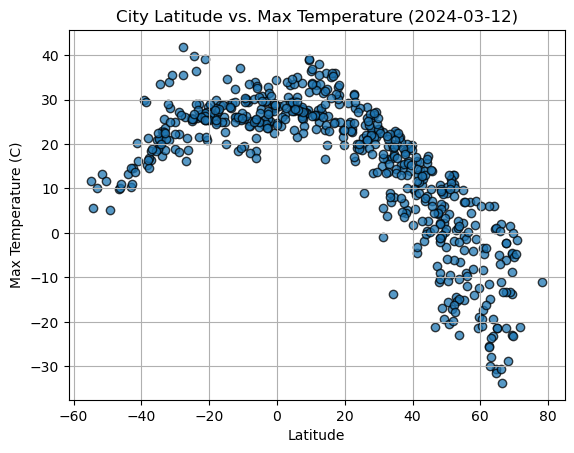

In [5]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Latitude vs. Max Temperature ({formatted_date})')   

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

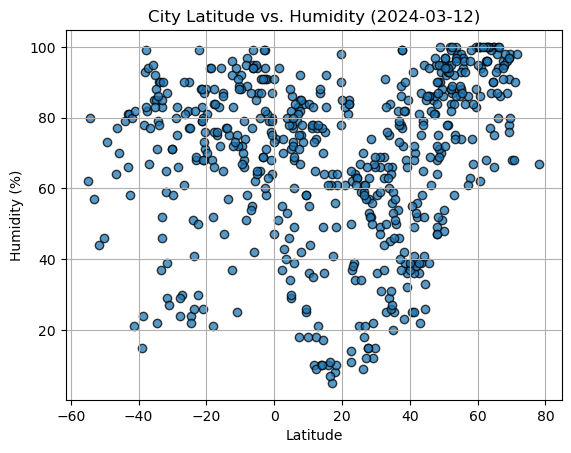

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({formatted_date})')       

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

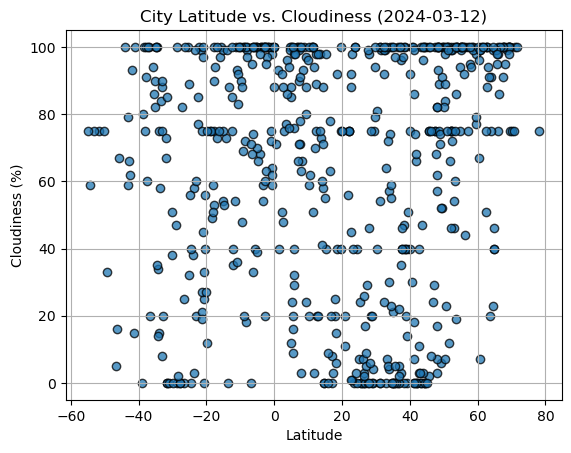

In [7]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({formatted_date})')      

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

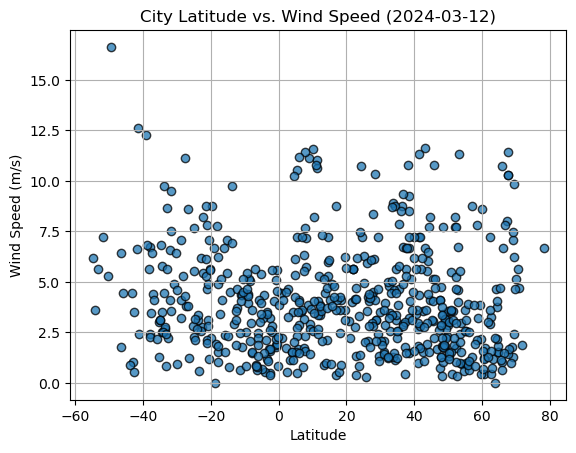

In [8]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=.75)

# Incorporate the other graph properties

#Coverting old date format - "UNIX-UTC" into a intuitize date format of "Year-Month-Day"
unix_timestamp = city_data_df['Date'][0]
local_time = time.localtime(unix_timestamp)
formatted_date = time.strftime("%Y-%m-%d", local_time)

# Adding in the gridlines
plt.grid()

# Adding x & y axis labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({formatted_date})')      

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots


# Creating a function to plot a scatter plot & linear regression line for each relationship for Northern & Sountern Hemisphere citites
def linear_regress_hemis(x_values, y_values, x_cord, y_cord):         # ==> "x_cord" & "y_cord" are used for the plotting the position of the string value equation of the linear regression line on the scatter plot

    # Defining linear Regression Line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    
    # Creating Regression Line
    regress_values = x_values * slope + intercept               
    
    # Creating a string value of Linear Regression Line to plot on graph
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Scatter plot of Latitude vs Max Temp for ONLY Cities in the Northern Hemisphere
    plt.scatter(x_values,y_values)
    
    # Plotting regression line on Scatter Plot
    plt.plot(x_values,regress_values,"r-")                     # "r-" => creating the Red dashes for each data point but combined with all the points it looks like a line
    
    # Plotting the Equation Line on Scatter Plot for easier analysis
    plt.annotate(line_eq,(x_cord,y_cord),fontsize=15,color="red")    
    
    # Labeling x & y axis
    plt.xlabel('Latitude')
    plt.ylabel(f"{y_values.name} ({units})")    # y_values.name ==> Will pull in the column value NAME being using as the y_values and {units} adds the units for each different metic being tested against latitude
    
    # Print statement for clarifing the r-value
    print(f"The r-value is: {rvalue**2}")                   # ALTHOUGH CORRELATION ==> Its most likley labeled wrong
    
    plt.show()

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]	

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,batangafo,7.3008,18.2833,33.68,18,90,0.79,CF,1710266253
5,iqaluit,63.7506,-68.5145,-23.15,77,20,0.00,CA,1710266259
7,ilulissat,69.2167,-51.1000,-13.85,91,100,1.26,GL,1710266262
8,khanpur mahar,27.8436,69.4137,22.43,53,46,4.52,PK,1710266264
9,saguenay,48.4168,-71.0657,-1.07,75,100,7.72,CA,1710266013


In [11]:
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]	

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,21.40,93,75,6.71,AR,1710265971
2,blackmans bay,-43.0167,147.3167,10.29,81,59,1.05,AU,1710266255
3,rundu,-17.9333,19.7667,30.00,21,59,1.52,NaN,1710266257
4,gobabis,-22.4500,18.9667,26.86,30,77,2.78,NaN,1710266258
6,port-aux-francais,-49.3500,70.2167,5.27,73,33,16.63,TF,1710266260


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7444344917824322


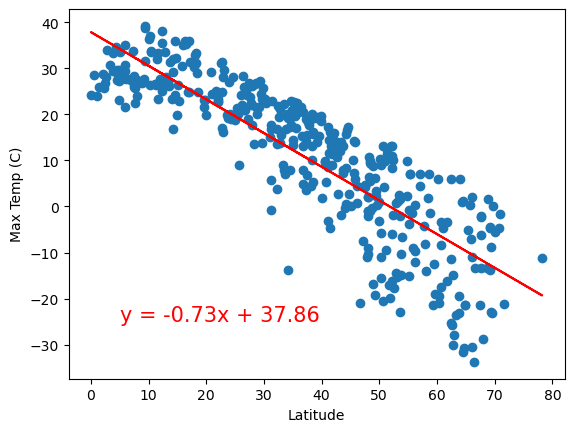

In [26]:
# Linear regression on Northern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Northern Hemisphere Citites ONLY for the relationship between Latitude vs Max Temp
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']

#Defining units for y-axis label
units = 'C'

# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, 5, -25)    # Plotting the linear regression equation on the scatter plot on x=5 & y=-25



The r-value is: 0.3516809894851428


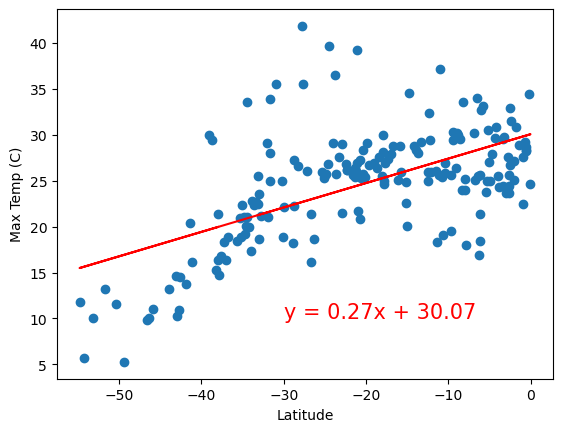

In [27]:
# Linear regression on Southern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Southern Hemisphere Citites ONLY for the relationship between Latitude vs Max Temp
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']

#Defining units for y-axis label
units = 'C'

# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, -30, 10)  # Plotting the linear regression equation on the scatter plot on x=-30 & y=10

**Discussion about the linear relationship:** As shown by linear regression lines plotted on the two graphs above regarding the correlation between the latitude of a given city vs the cities maximum temperature based on randomly generated cities located in both the northern hemisphere and southern hemisphere. The linear relationship between the latitude of cities in the northern hemisphere vs a cities maximum temperature has a moderately strong negative correlation which implies that as the given cities latitide is located more north (increase in latitude), the maximum temperature tends to decrease. This is also show by the linear regression line that predicts that the more north a city is located (increase in latitude), the cities maximum temperature tends to decrease. The linear relationship between the latitude of cities in the southern hemisphere vs a cities maximum temperature has a weak positive correlation which implies that as a given cities latitide is located more south (decrease in latitude), the maximum temperature tends to decrease. This is also shown by the linear regression line but since its a weak correlation, the line predicts that there might be a decrease in maximum temperature as a city is located more south. Although both of these scatter plots with their respective linear regression lines show a positive and negative relationship between a cities latitude vs maximum temperature in their respective hemipsheres, the common theme is that as a city is located closer to the equator (latitude = 0), the higher the maximum temperature of that city becomes. This makes sense because the equator receives the most amount of sunlight year round which would result in higher maximum temperatures and as a cities location gets futher away from the equator either north or south, the maxiumum tempteratures of cities will start to decrease. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.20065091898501042


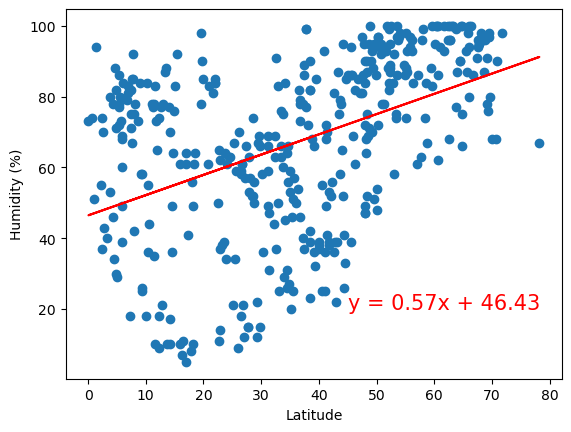

In [28]:
# Linear regression on Northern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Northern Hemisphere Citites ONLY for the relationship between Latitude vs Humidity
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']

#Defining units for y-axis label
units = '%'

# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, 45, 20)    # Plotting the linear regression equation on the scatter plot on x=45 & y=20


The r-value is: 0.0416735974253153


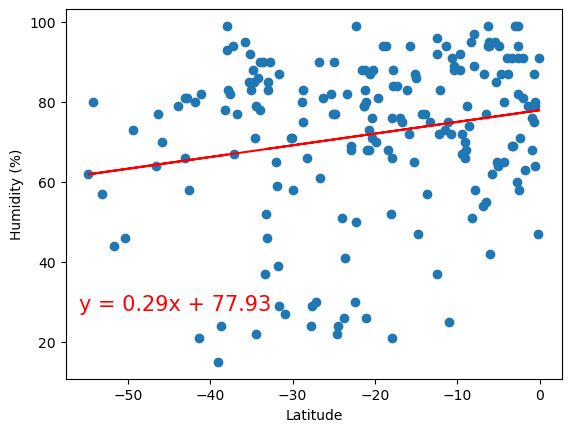

In [29]:
# Linear regression on Southern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Southern Hemisphere Citites ONLY for the relationship between Latitude vs Humidity
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']

#Defining units for y-axis label
units = '%'

# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, -56, 28)  # Plotting the linear regression equation on the scatter plot on x=-56 & y=28

**Discussion about the linear relationship:** As shown by linear regression lines plotted on the two graphs above regarding the correlation between the latitude of a given city vs the cities humidity based on randomly generated cities located in both the northern hemisphere and southern hemisphere. The linear relationship between the latitude of cities in the northern hemisphere vs a cities humidity has a weak positive correlation which implies that there is almost none to very little accociation between the two metrics of latitude vs humidity but the linear regression line does predict the more north a city is located (increase in latitude), there might be a very slight increase in humidity. The linear relationship between the latitude of cities in southern hemisphere vs a cities humidity has a very weak positive correlation, this implies that there is no association between a cities latitude vs its humidity in the southern hemisphere but the linear regression line does predict the more south a city is located (decrease in latitude), there might be a very slight increase in humidity. Although both of these scatter plots with their respective linear regression lines show a positive relationship between a cities latitude vs humidity in their respective hemipsheres, the correlations show that these metrics arent sufficent for explaining the cloudiness of a city based on a given cities latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.042388851621067355


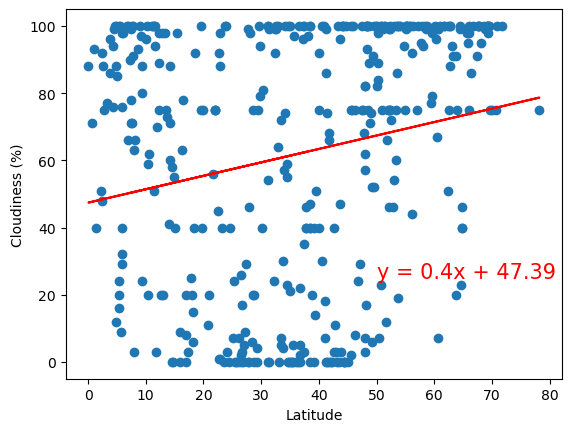

In [30]:
# Linear regression on Northern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Northern Hemisphere Citites ONLY for the relationship between Latitude vs Cloudiness
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']

#Defining units for y-axis label
units = '%'

# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, 50, 25)    # Plotting the linear regression equation on the scatter plot on x=50 & y=25

The r-value is: 0.05933459606381443


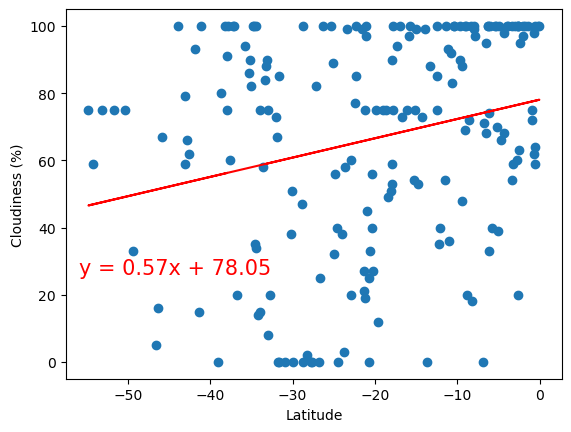

In [31]:
# Linear regression on Southern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Southern Hemisphere Citites ONLY for the relationship between Latitude vs Cloudiness
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']

#Defining units for y-axis label
units = '%'


# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, -56, 26)  # Plotting the linear regression equation on the scatter plot on x=-56 & y=26

**Discussion about the linear relationship:** As shown by linear regression lines plotted on the two graphs above regarding the correlation between the latitude of a given city vs the cities cloudiness based on randomly generated cities located in both the northern hemisphere and southern hemisphere. The linear relationship between the latitude of cities in the northern hemisphere vs a cities cloudiness has a very weak positive correlation which implies that there is no association between the two metircs of latitude vs cloudiness but the linear regression line does predict the more north a city is located (increase in latitude), there might be a very slight increase in cloudiness. The linear relationship between the latitude of cities in southern hemisphere vs a cities cloudiness also has a very weak positive correlation, this implies that there is no association between a cities latitude vs its cloudiness in the southern hemisphere but the linear regression line does predict there might be a very slight increase in cloudiness as a cities is located more south (decrease in latitude). Although both of these scatter plots with their respective linear regression lines show a positive relationship between a cities latitude vs cloudiness in their respective hemipsheres, the correlations show that these metrics arent sufficent for explaining the cloudiness of a city based on a given cities latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.009019545005224429


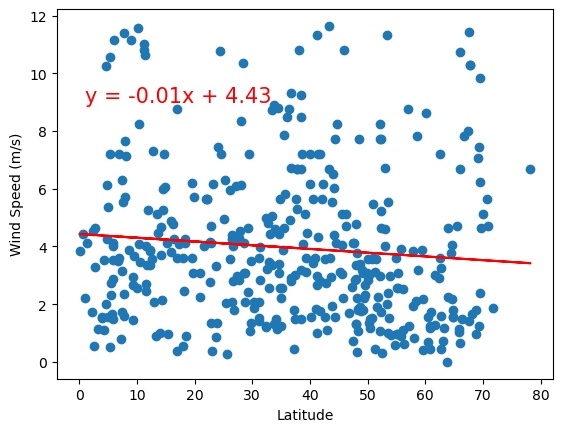

In [32]:
# Linear regression on Northern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Northern Hemisphere Citites ONLY for the relationship between Latitude vs Wind Speed
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']

#Defining units for y-axis label
units = 'm/s'

# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, 1, 9)    # Plotting the linear regression equation on the scatter plot on x=1 & y=9

The r-value is: 0.11473221506017414


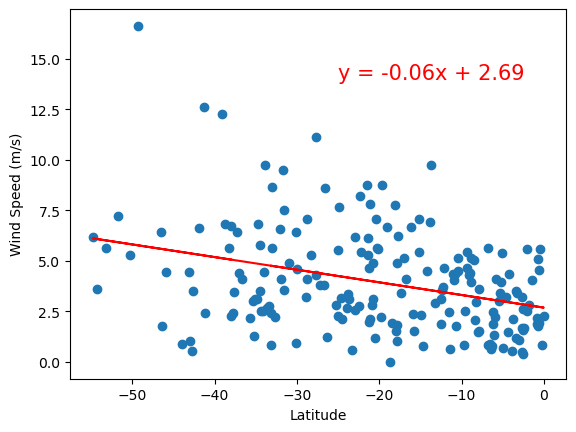

In [33]:
# Linear regression on Southern Hemisphere

#Defining x & y values for Scatter Plot and Linear Regression Line for Southern Hemisphere Citites ONLY for the relationship between Latitude vs Wind Speed
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']

#Defining units for y-axis label
units = 'm/s'


# Calling in Def Function "linear_regress_hemis"
linear_regress_hemis(x_values, y_values, -25, 14)  # Plotting the linear regression equation on the scatter plot on x=-25 & y=14

**Discussion about the linear relationship:**  As shown by linear regression lines plotted on the two graphs above regarding the correlation between the latitude of a given city vs the cities wind speed based on randomly generated cities located in both the northern hemisphere and southern hemisphere. The linear relationship between the latitude of cities in the northern hemisphere vs a cities wind speed has a very weak negative correlation which implies that there is no association between the two metircs of latitude vs wind speed. The same can be seen by looking at the linear relationship between the latitude of cities in the southern hemisphere vs a cities wind speed, this relationship also has a very weak negative correlation which implies that there is no association between the two metircs of latitude vs wind speed. Although both of these scatter plots with their respective linear regression lines show a negative relationship between a cities latitude vs wind speed in their respective hemipsheres, the correlations show that these metrics arent sufficent for explaining the wind speed of a city based on a given cities latitude. 